<a href="https://colab.research.google.com/github/Venkatpolavarapu/Data-Science/blob/master/PCA_and_clusteringTrading_assets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
from matplotlib import style
import seaborn as sns
from scipy.stats import randint as sp_randint
from sklearn.decomposition import PCA
from pathlib import Path
import pandas as pd
style.use("ggplot")

# loading the data

#github_p = "https://github.com/Finance-781/FinML/blob/master/Lecture%207%20-%20Principal%20Components/Inclass/data/"
#github_p = "https://github.com/Finance-781/FinML/blob/master/Lecture%207%20-%20Principal%20Components/Inclass/data/Dow_adjcloses.csv"
url = 'https://raw.githubusercontent.com/Finance-781/FinML/master/Lecture%207%20-%20Principal%20Components/Inclass/data/Dow_adjcloses.csv'
df = pd.read_csv(url, parse_dates=True,index_col=0)
df.head()

,MMM,AXP,AAPL,BA,CAT,CVX,CSCO,KO,DIS,DWDP,XOM,GS,HD,IBM,INTC,JNJ,JPM,MCD,MRK,MSFT,NKE,PFE,PG,TRV,UTX,UNH,VZ,V,WMT,WBA
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2000-01-03,29.847043,35.476634,3.530576,26.650218,14.560887,21.582046,43.003876,16.983583,23.522220,NaN,23.862240,72.316570,45.143382,81.449761,28.525123,28.584797,26.862510,24.393585,32.896986,38.135101,4.701180,16.746856,32.227726,20.158885,21.319030,5.841355,22.564221,NaN,47.337599,21.713237
2000-01-04,28.661131,34.134275,3.232839,26.610431,14.372251,21.582046,40.577200,17.040950,24.899860,NaN,23.405167,67.763517,40.510629,78.683277,27.193951,27.536780,26.280065,23.888848,31.739292,36.846046,4.445214,16.121738,31.596399,19.890099,20.445803,5.766368,21.833915,NaN,45.566248,20.907354
2000-01-05,30.122175,33.959430,3.280149,28.473758,14.914205,22.049145,40.895453,17.228147,25.781550,NaN,24.569179,65.257700,42.761219,81.449761,27.748059,27.964669,26.116927,24.393585,33.198570,37.235380,4.702157,16.415912,31.325831,20.085579,20.254784,5.753327,22.564221,NaN,44.503437,21.097421
2000-01-06,31.877325,33.959430,2.996290,28.553331,15.459153,22.903343,39.781569,17.210031,24.899860,NaN,25.958680,67.354070,41.549363,80.045454,25.820155,28.699520,26.487695,23.931935,33.261805,35.988857,4.677733,16.972739,32.438168,20.122232,20.998392,5.964159,22.449405,NaN,45.126952,20.527220
2000-01-07,32.509812,34.433913,3.138219,29.382213,15.962182,23.305926,42.128682,18.342270,24.506249,NaN,25.882501,67.607927,43.973075,79.694378,26.885748,29.921172,26.973402,24.547469,36.452760,36.459983,4.677733,18.123166,35.023602,20.922479,21.830687,6.662948,22.282692,NaN,48.535033,21.051805


In [22]:
# Dropping 'Not a Number' columns for Dow Chemicals (DWDP) and Visa (V)
#df.dropna(subset=['DWDP', 'V'], inplace=True)
df.dropna(axis=1,how='any')
# Copying the dataframe to add features
data = pd.DataFrame(df.copy())
# Daily Returns
# Daily Log Returns (%)
# datareturns = np.log(data / data.shift(1)) 

# Daily Linear Returns (%)
datareturns = data.pct_change(1)

# Dow Jones Equal Weighted rETURN
datareturns["DJIA"] = datareturns.mean(axis=1)

# Data Raw
data_raw = datareturns
data_raw.dropna(how='all', inplace=True)

# Normalizing the returns
data = (data_raw - data_raw.mean()) / data_raw.std()

# Getting rid of the NaN values.
data.dropna(how='any', inplace=True)
data_raw.dropna(how='any', inplace=True)

In [24]:
data.head()

,MMM,AXP,AAPL,BA,CAT,CVX,CSCO,KO,DIS,XOM,GS,HD,IBM,INTC,JNJ,JPM,MCD,MRK,MSFT,NKE,PFE,PG,TRV,UTX,UNH,VZ,WMT,WBA,DJIA
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2000-01-04,-2.783305,-1.714531,-3.315064,-0.118649,-0.672149,-0.030177,-2.304726,0.236964,3.089027,-1.283097,-2.714789,-5.295384,-2.099699,-2.011289,-3.079583,-0.901424,-1.462433,-2.077528,-1.775213,-2.927985,-2.410473,-1.504783,-0.763609,-2.479568,-0.698935,-2.097284,-2.506437,-2.167895,-2.739489
2000-01-05,3.491453,-0.250475,0.522450,3.667073,1.828679,1.321853,0.305449,0.823741,1.857074,3.247575,-1.602958,2.828331,2.143554,0.854168,1.258720,-0.274933,1.421298,2.670268,0.527790,3.023666,1.148279,-0.671468,0.510782,-0.588825,-0.164440,2.128033,-1.568817,0.502376,1.631646
2000-01-06,3.995818,-0.021248,-3.400666,0.108313,1.770951,2.389941,-1.119210,-0.104682,-1.845881,3.696220,1.354230,-1.480368,-1.073088,-2.986300,2.151198,0.551123,-1.340634,0.092346,-1.758319,-0.316511,2.151911,2.659281,0.070428,2.165327,1.801922,-0.346058,0.914757,-1.584911,0.181378
2000-01-07,1.337698,0.604016,1.791770,1.497066,1.573522,1.067883,2.382987,5.050971,-0.867545,-0.216324,0.140793,2.970992,-0.283959,1.747178,3.504918,0.718754,1.737915,5.592436,0.658821,-0.041103,4.320217,5.999317,2.158221,2.340150,5.871398,-0.496143,5.006585,1.453883,3.054606
2000-01-10,-0.371257,0.624764,-0.727008,-0.780316,-1.653060,-1.711071,1.482524,-2.486755,8.090552,-0.944732,0.922873,-0.275606,2.419040,1.937881,-2.133969,-0.719230,0.275594,-1.728435,0.356603,0.855881,-0.131547,-0.413525,-1.026003,0.558540,-0.923939,-0.357794,-1.231132,1.667529,0.250687


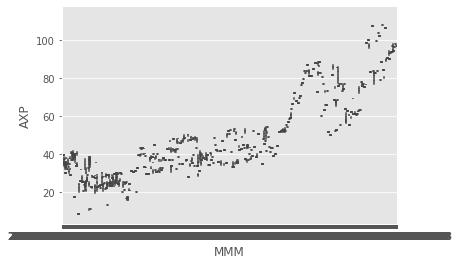

In [26]:
sns.boxplot(x='MMM',y='AXP',data=df)

In [37]:
df.describe()


,MMM,AXP,AAPL,BA,CAT,CVX,CSCO,KO,DIS,XOM,GS,HD,IBM,INTC,JNJ,JPM,MCD,MRK,MSFT,NKE,PFE,PG,TRV,UTX,UNH,VZ,WMT,WBA
count,4804.000000,4804.000000,4804.000000,4804.000000,4804.000000,4804.000000,4804.000000,4804.000000,4804.000000,4804.000000,4804.000000,4804.000000,4804.000000,4804.000000,4804.000000,4804.000000,4804.000000,4804.000000,4804.000000,4804.000000,4804.000000,4804.000000,4804.000000,4804.000000,4804.000000,4804.000000,4804.000000,4804.000000
mean,86.768590,49.659383,49.106634,85.481517,56.697445,61.735451,21.652896,24.983814,46.367724,54.740800,132.888921,57.416138,104.716062,22.283808,61.493487,41.503377,59.953787,35.651953,31.982743,23.724266,20.736962,49.959573,55.961115,62.208919,64.417705,27.193436,50.766604,41.696637
std,53.941623,22.564051,55.020296,79.084514,34.663396,31.713863,10.074094,10.611235,32.733220,20.686994,52.331009,49.243013,38.764234,10.140584,31.651018,23.722994,44.645270,13.826110,21.984209,20.987536,7.629779,19.769481,34.644166,32.626864,62.920008,11.973258,17.039732,19.937069
min,25.140195,8.713025,0.827607,17.463252,9.247340,17.565805,6.842430,11.698790,11.018313,19.491235,45.647900,14.067132,39.242274,8.725477,21.316177,9.839093,7.973800,14.674572,11.908193,2.594833,8.041066,16.203766,13.286538,14.520547,5.175169,11.209926,30.747677,17.317194
25%,51.191601,34.078903,3.899987,37.406768,26.335348,31.820217,14.910132,15.419998,22.044106,33.381211,85.301255,25.462662,67.954136,15.329185,39.208908,26.374211,20.735687,25.826212,19.157716,8.036966,15.030615,35.413562,29.906759,34.328042,23.498173,17.433612,38.062387,27.704467
50%,63.513883,42.274116,23.316182,58.436552,53.047521,56.941779,18.577993,20.563342,29.521283,57.192944,134.272958,30.783696,94.118585,18.516096,47.141733,33.031793,44.424943,30.952006,22.476518,14.146826,18.643331,46.734628,39.823712,55.714581,42.923977,21.556066,42.782495,32.705776
75%,122.906370,66.815558,84.007174,112.996317,76.487605,91.687905,24.649935,34.927140,75.833054,73.712054,166.302838,72.425322,143.030450,28.141560,85.587382,50.476441,83.751573,46.784171,36.172447,36.544526,25.402775,68.134961,80.767355,92.557058,73.170959,38.995728,65.076409,58.164790
max,251.980826,112.420728,231.260273,411.110000,166.832487,128.679825,63.698248,50.400000,117.972904,88.851798,270.418835,212.615743,178.293666,56.023157,147.840000,116.849738,188.510000,78.773506,115.105584,85.300186,45.841240,98.030000,146.564192,141.279565,286.330000,60.016174,107.009557,90.187639


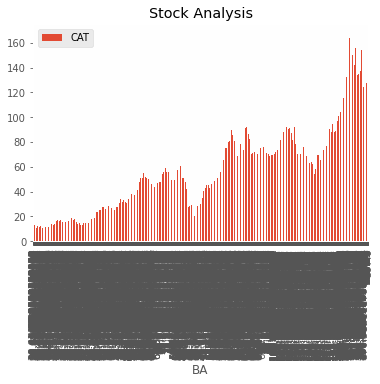

In [40]:
df.plot(kind='bar', x='BA',y='CAT',title='Stock Analysis')

In [23]:
df.head()

,MMM,AXP,AAPL,BA,CAT,CVX,CSCO,KO,DIS,XOM,GS,HD,IBM,INTC,JNJ,JPM,MCD,MRK,MSFT,NKE,PFE,PG,TRV,UTX,UNH,VZ,WMT,WBA
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2000-01-03,29.847043,35.476634,3.530576,26.650218,14.560887,21.582046,43.003876,16.983583,23.522220,23.862240,72.316570,45.143382,81.449761,28.525123,28.584797,26.862510,24.393585,32.896986,38.135101,4.701180,16.746856,32.227726,20.158885,21.319030,5.841355,22.564221,47.337599,21.713237
2000-01-04,28.661131,34.134275,3.232839,26.610431,14.372251,21.582046,40.577200,17.040950,24.899860,23.405167,67.763517,40.510629,78.683277,27.193951,27.536780,26.280065,23.888848,31.739292,36.846046,4.445214,16.121738,31.596399,19.890099,20.445803,5.766368,21.833915,45.566248,20.907354
2000-01-05,30.122175,33.959430,3.280149,28.473758,14.914205,22.049145,40.895453,17.228147,25.781550,24.569179,65.257700,42.761219,81.449761,27.748059,27.964669,26.116927,24.393585,33.198570,37.235380,4.702157,16.415912,31.325831,20.085579,20.254784,5.753327,22.564221,44.503437,21.097421
2000-01-06,31.877325,33.959430,2.996290,28.553331,15.459153,22.903343,39.781569,17.210031,24.899860,25.958680,67.354070,41.549363,80.045454,25.820155,28.699520,26.487695,23.931935,33.261805,35.988857,4.677733,16.972739,32.438168,20.122232,20.998392,5.964159,22.449405,45.126952,20.527220
2000-01-07,32.509812,34.433913,3.138219,29.382213,15.962182,23.305926,42.128682,18.342270,24.506249,25.882501,67.607927,43.973075,79.694378,26.885748,29.921172,26.973402,24.547469,36.452760,36.459983,4.677733,18.123166,35.023602,20.922479,21.830687,6.662948,22.282692,48.535033,21.051805
